In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Ridge
from sklearn.metrics import mean_absolute_error,mean_squared_error
from joblib import dump,load

In [4]:
df=pd.read_csv("Height-Weight Data.csv")
df

,Height,Weight
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801
...,...,...
3496,69.296830,185.649086
3497,70.542201,210.198845
3498,73.912549,202.429960
3499,67.396021,144.277671


<AxesSubplot:xlabel='Height', ylabel='Weight'>

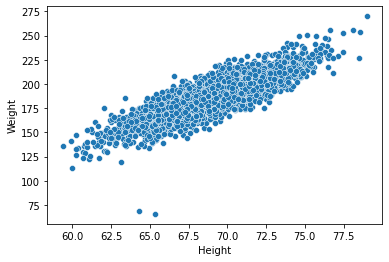

In [5]:
#VISUALIZATION

sns.scatterplot(data=df,x='Height',y='Weight')

In [6]:
X=df.drop('Weight',axis=1)

y=df['Weight']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
    
model=LinearRegression()

model.fit(X,y)
model.coef_

array([5.95843786])

In [7]:
model.intercept_

-224.38640537131263

In [8]:
preds=model.predict(X_test)
mae=mean_absolute_error(y_test,preds)

mse=np.sqrt(mean_squared_error(y_test,preds))
mse

10.098423458847693

In [9]:
mae

8.15487412792002

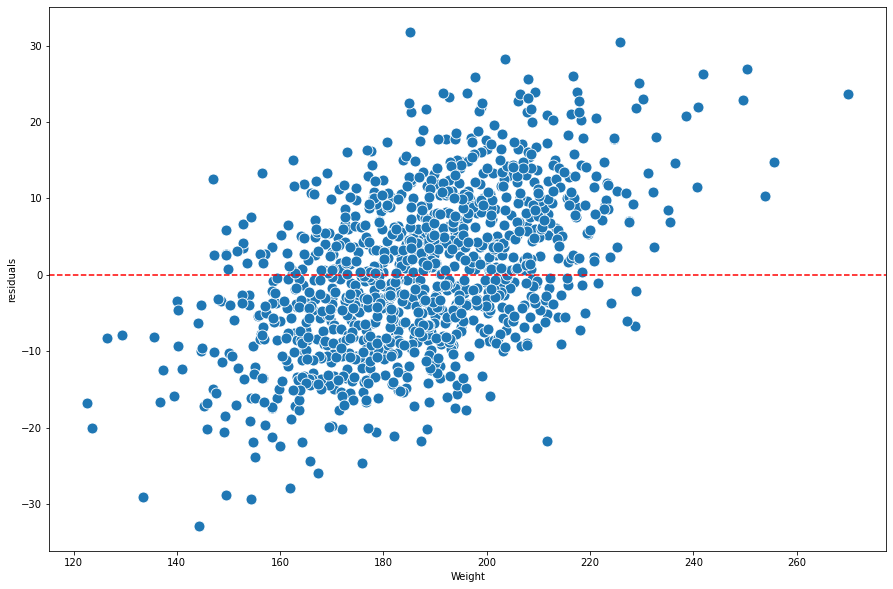

In [20]:
#CHECKING  IF LINEAR REGRESSION IS BEST SUITED FOR THIS DATA
plt.figure(figsize=(15,10))
rss=y_test-preds
p=sns.scatterplot(x=y_test,y=rss,s=120)
p.set_ylabel("residuals")
plt.axhline(y=0,color='r',ls='--')

#IF the distribution is evenly set around 0 , in other words if the 
#distribution points are evenly distributed around 0 and not forming any
#noticable significant pattern its suitable to trained with linear regression 


<AxesSubplot:xlabel='Weight', ylabel='Density'>

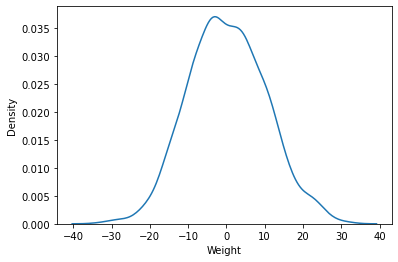

In [21]:
sns.kdeplot(rss)

In [29]:
model.predict([[70.324753]])

array([194.63926575])

In [31]:
final_model=LinearRegression()

In [32]:
final_model.fit(X,y)

LinearRegression()

In [33]:
final_model.coef_

array([5.95843786])

In [34]:
final_pred=final_model.predict(X)
final_pred

array([215.62645706, 185.44629614, 217.19405276, ..., 216.01692618,
       177.18859679, 209.02422774])

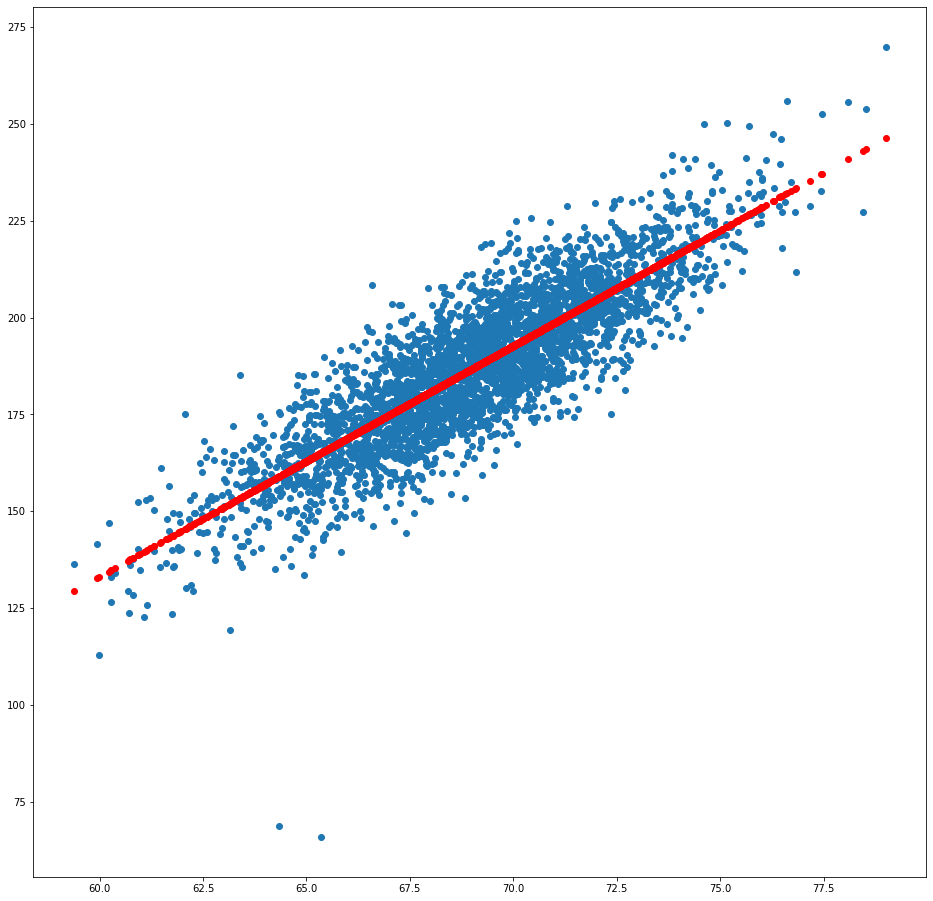

In [47]:
fig,axes = plt.subplots(figsize=(16,16))
axes.plot(df['Height'],df['Weight'],'o')
axes.plot(df['Height'],final_pred,'o',color='red')

In [48]:
final_pred

array([215.62645706, 185.44629614, 217.19405276, ..., 216.01692618,
       177.18859679, 209.02422774])

In [50]:
y

0       241.893563
1       162.310473
2       212.740856
3       220.042470
4       206.349801
           ...    
3496    185.649086
3497    210.198845
3498    202.429960
3499    144.277671
3500    187.222909
Name: Weight, Length: 3501, dtype: float64

In [53]:
user_input=float(input('Enter Height Value:'))

final_model.predict([[user_input]])

Enter Height Value:62.5


array([148.01596119])

In [ ]:
dump(final_model,'final_Height_Weight_Estimator_model.joblib')